In [28]:
pip install shap

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neural_network import MLPClassifier
import shap

In [32]:
data = pd.read_csv("/content/Maternal Health Risk Data Set.csv")

In [33]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [34]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [23]:
data = data.dropna()

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    0 non-null      float64
dtypes: float64(3), int64(4)
memory usage: 55.6 KB


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [36]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


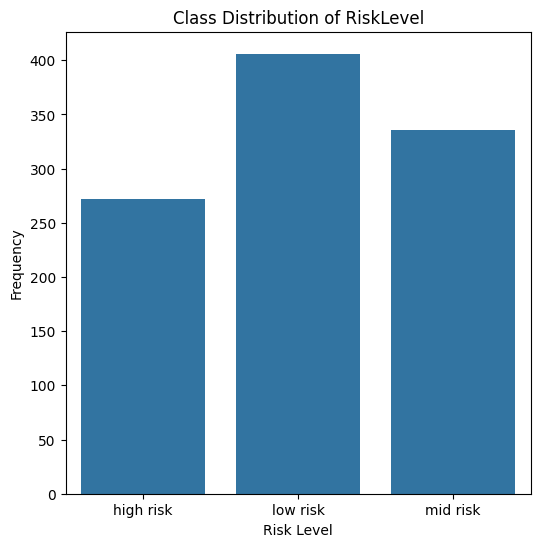

In [37]:
plt.figure(figsize=(6, 6))
sns.countplot(x='RiskLevel', data=data)
plt.title('Class Distribution of RiskLevel')
plt.xlabel('Risk Level')
plt.ylabel('Frequency')
plt.show()

<Figure size 1200x800 with 0 Axes>

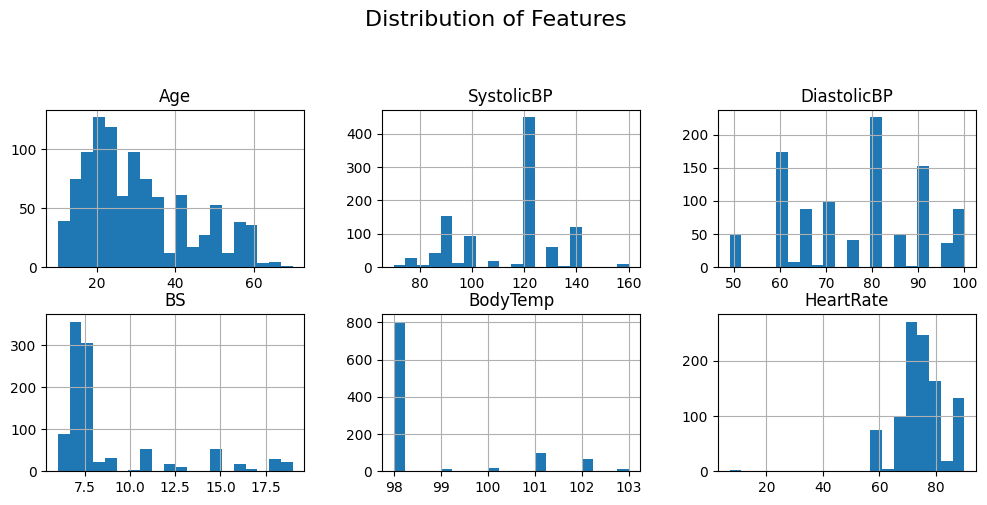

In [39]:
data_numeric = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
data_numeric.hist(bins=20, figsize=(12, 10), layout=(4, 3))
plt.suptitle('Distribution of Features', size=16)
plt.show()

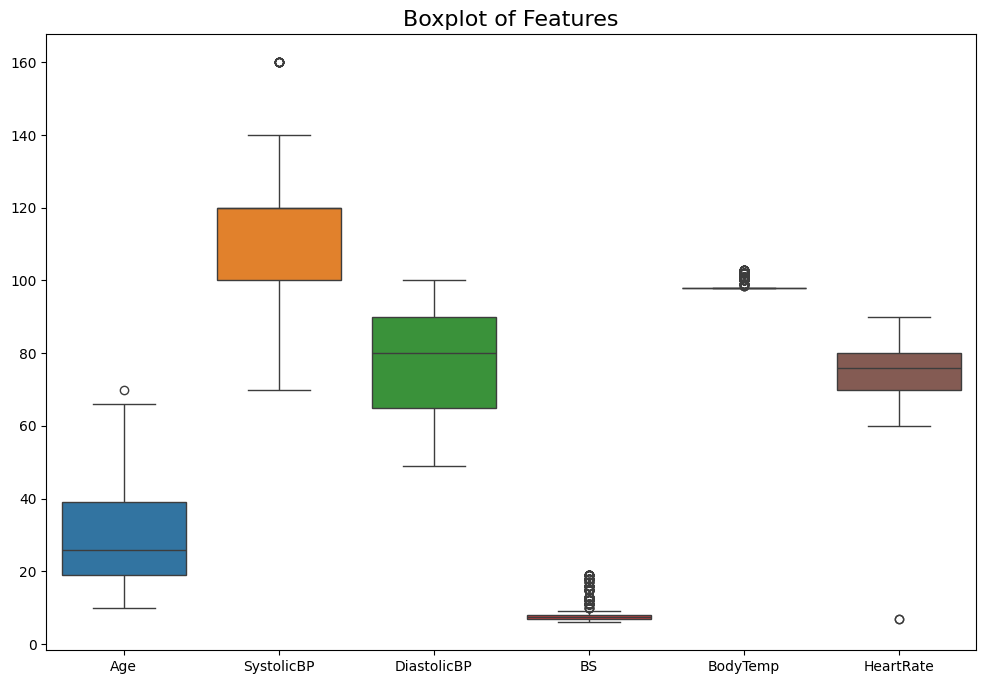

In [40]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_numeric)
plt.title('Boxplot of Features', size=16)
plt.show()

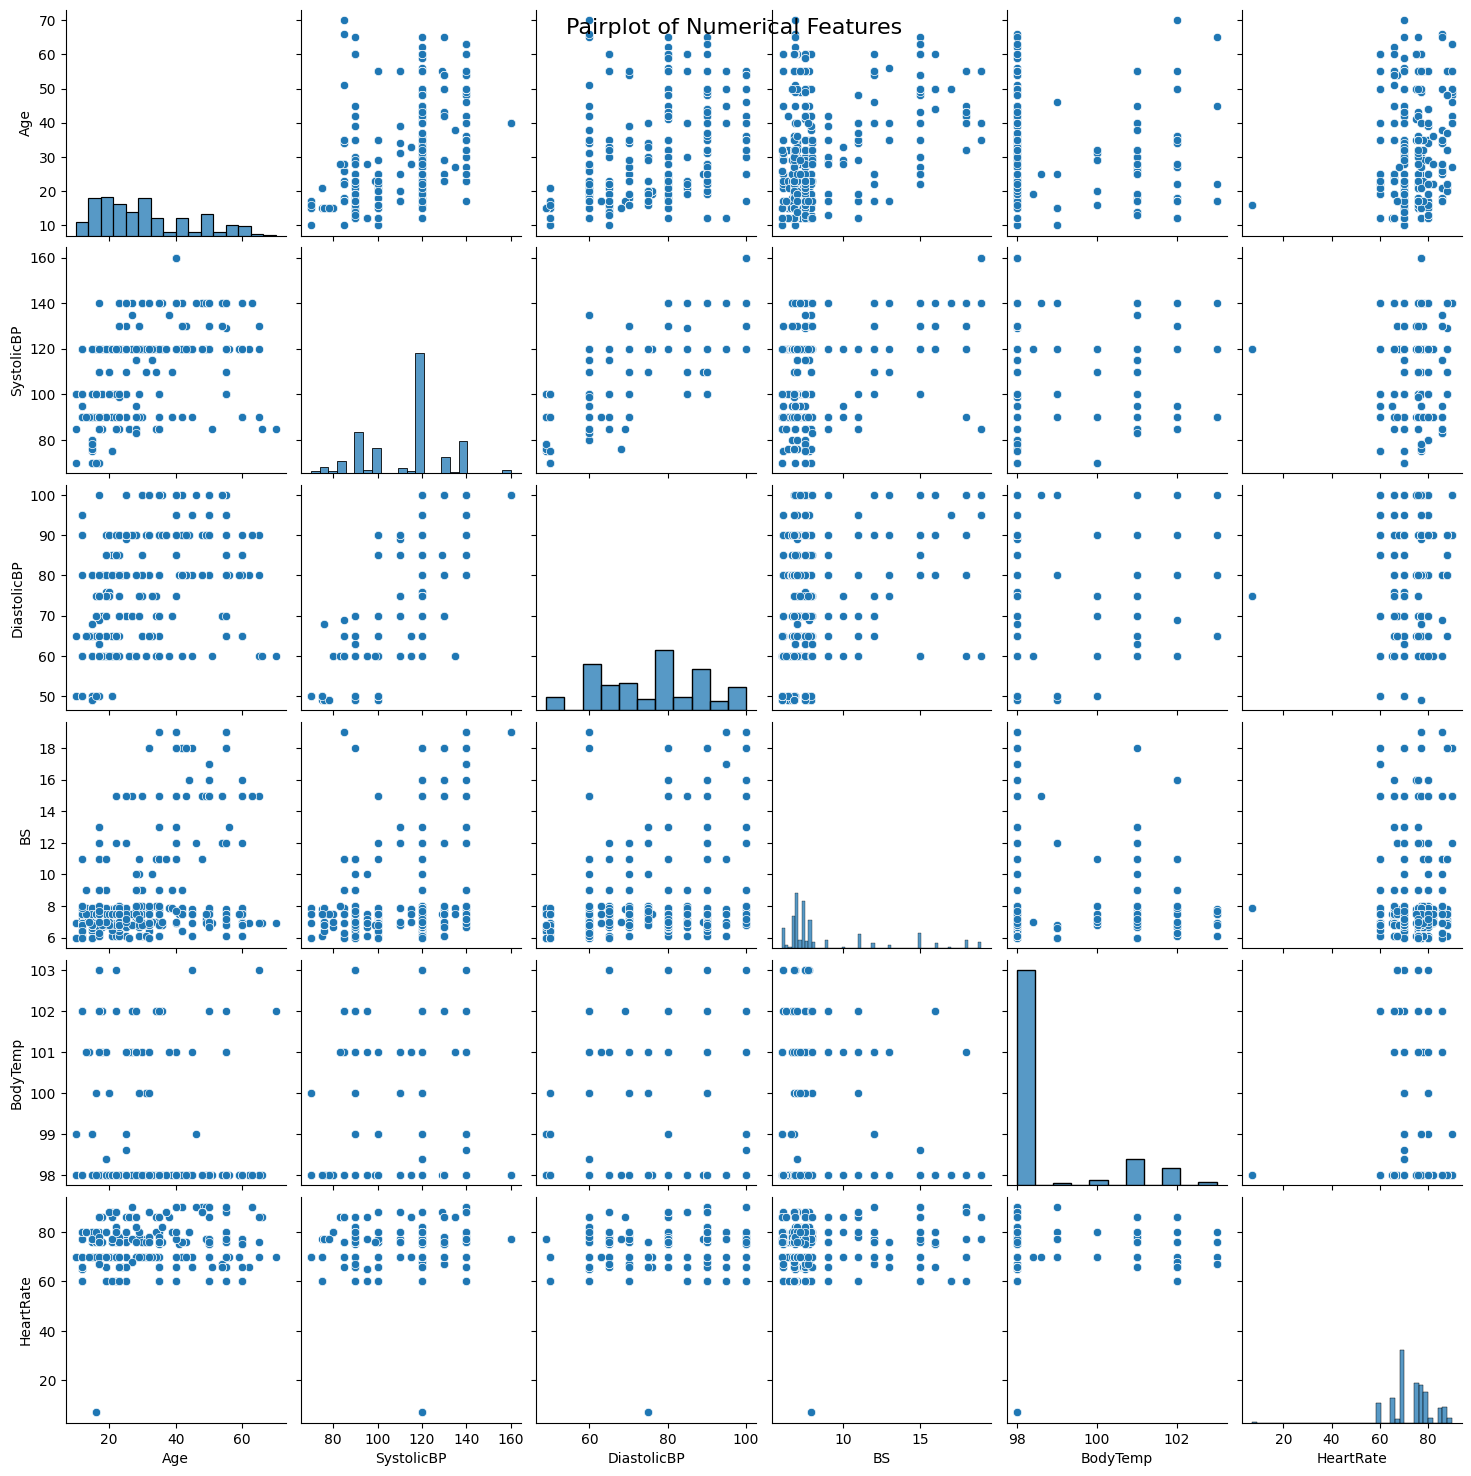

In [43]:
sns.pairplot(data_numeric, height=2.5)
plt.suptitle('Pairplot of Numerical Features', size=16)
plt.show()

In [44]:
data['RiskLevel'] = data['RiskLevel'].map({'high risk': 1, 'mid risk': 2, 'low risk': 3})

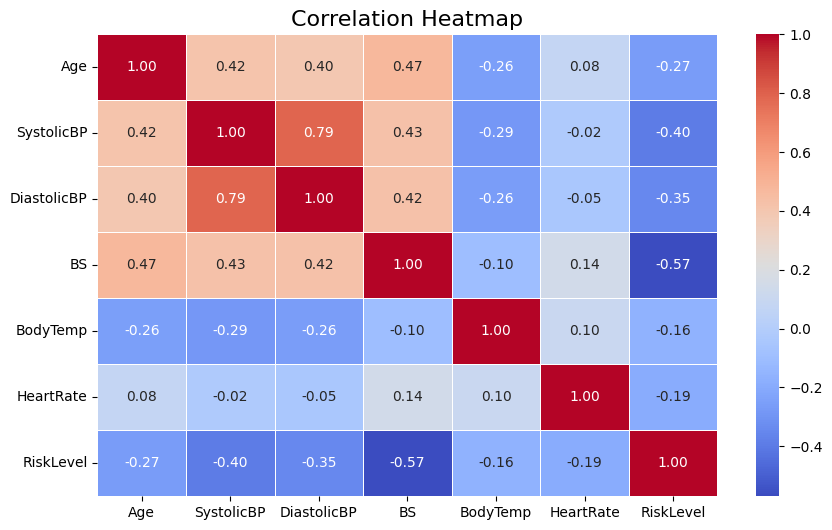

In [45]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap", size=16)
plt.show()

In [46]:
X = data.drop('RiskLevel', axis=1)
y = data['RiskLevel']

In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [63]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Ridge Classifier': RidgeClassifier(),
    'MLP Classifier': MLPClassifier(),
    'Stacking': StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier()),
            ('svm', SVC())
        ], final_estimator=LogisticRegression()
    ),
    'Bagging': BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)  # Corrected parameter name
}

In [65]:
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10], 'solver': ['liblinear']},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Decision Tree': {'max_depth': [5, 10, 15], 'min_samples_split': [2, 5]},
    'Random Forest': {'n_estimators': [50, 100], 'max_depth': [5, 10], 'min_samples_split': [2, 5]},
    'AdaBoost': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]},
    'Naive Bayes': {},
    'KNN': {'n_neighbors': [3, 5, 7]},
    'Ridge Classifier': {'alpha': [0.1, 1, 10]},
    'MLP Classifier': {'hidden_layer_sizes': [(50,), (100,)], 'activation': ['relu', 'tanh']},
    'Stacking': {},  # No hyperparameters for StackingClassifier
    'Bagging': {'n_estimators': [50, 100], 'max_samples': [0.5, 0.8]}
}

Tuning hyperparameters for Logistic Regression using GridSearchCV and 10-fold CV...
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Best Params for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Tuning hyperparameters for SVM using GridSearchCV and 10-fold CV...
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best Params for SVM: {'C': 1, 'kernel': 'rbf'}
Tuning hyperparameters for Decision Tree using GridSearchCV and 10-fold CV...
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best Params for Decision Tree: {'max_depth': 15, 'min_samples_split': 2}
Tuning hyperparameters for Random Forest using GridSearchCV and 10-fold CV...
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best Params for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Tuning hyperparameters for AdaBoost using GridSearchCV and 10-fold CV...
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best Params for AdaBoost: {'l

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best Params for MLP Classifier: {'activation': 'relu', 'hidden_layer_sizes': (100,)}
Tuning hyperparameters for Stacking using GridSearchCV and 10-fold CV...
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best Params for Stacking: {}
Tuning hyperparameters for Bagging using GridSearchCV and 10-fold CV...
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best Params for Bagging: {'max_samples': 0.5, 'n_estimators': 100}

Logistic Regression (Best Model) Evaluation:


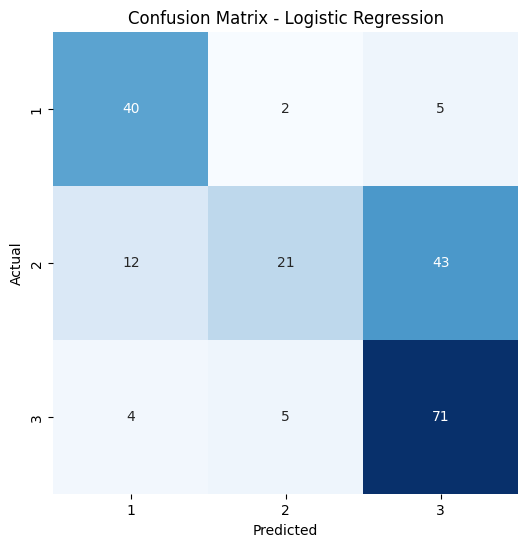

Accuracy: 0.6502
Precision (Weighted): 0.6813
Recall (Weighted): 0.6502
F1-Score (Weighted): 0.6122

SVM (Best Model) Evaluation:


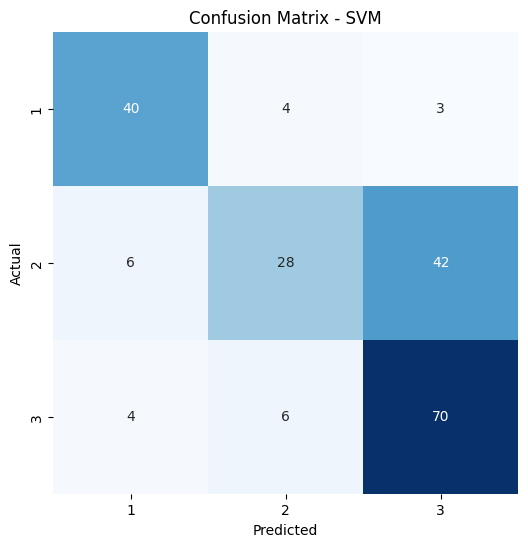

Accuracy: 0.6798
Precision (Weighted): 0.7010
Recall (Weighted): 0.6798
F1-Score (Weighted): 0.6578

Decision Tree (Best Model) Evaluation:


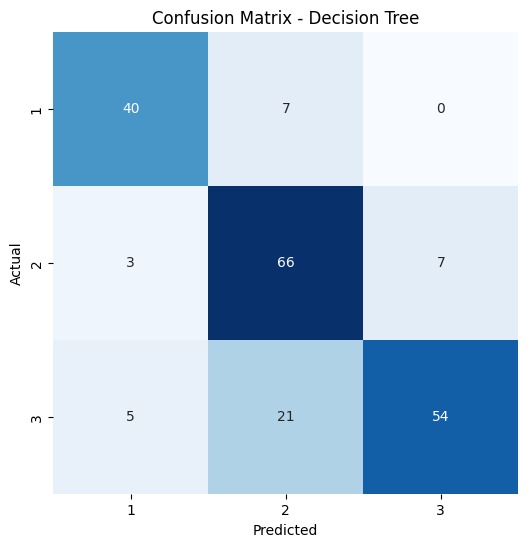

Accuracy: 0.7882
Precision (Weighted): 0.8047
Recall (Weighted): 0.7882
F1-Score (Weighted): 0.7875

Random Forest (Best Model) Evaluation:


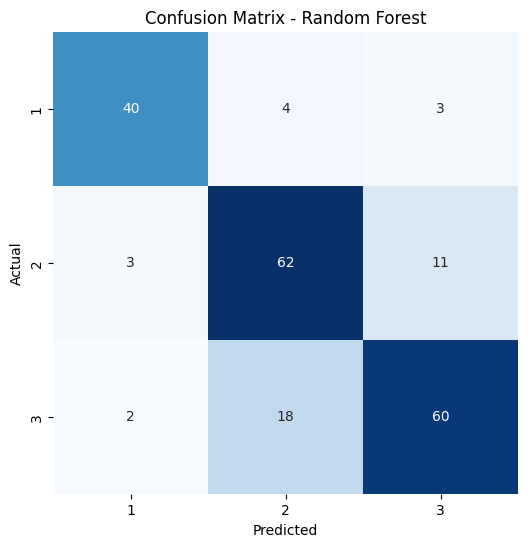

Accuracy: 0.7980
Precision (Weighted): 0.8017
Recall (Weighted): 0.7980
F1-Score (Weighted): 0.7986

AdaBoost (Best Model) Evaluation:


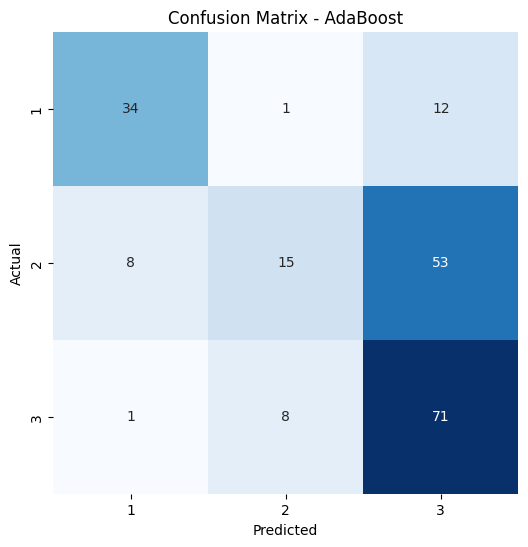

Accuracy: 0.5911
Precision (Weighted): 0.6228
Recall (Weighted): 0.5911
F1-Score (Weighted): 0.5463

Naive Bayes (Best Model) Evaluation:


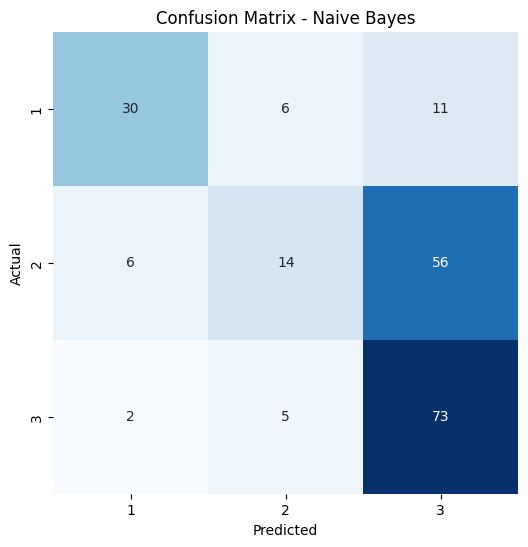

Accuracy: 0.5764
Precision (Weighted): 0.5979
Recall (Weighted): 0.5764
F1-Score (Weighted): 0.5288

KNN (Best Model) Evaluation:


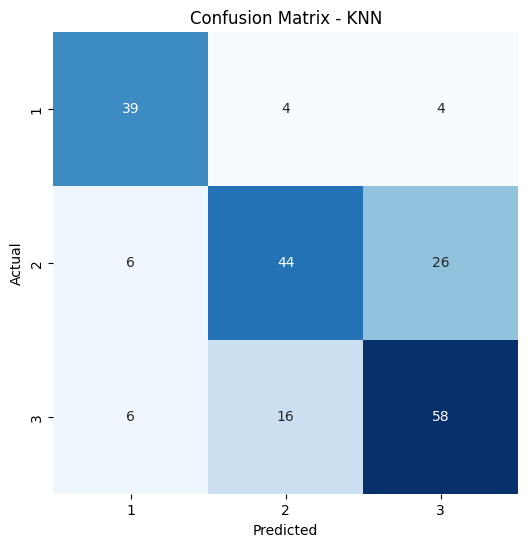

Accuracy: 0.6946
Precision (Weighted): 0.6942
Recall (Weighted): 0.6946
F1-Score (Weighted): 0.6917

Ridge Classifier (Best Model) Evaluation:


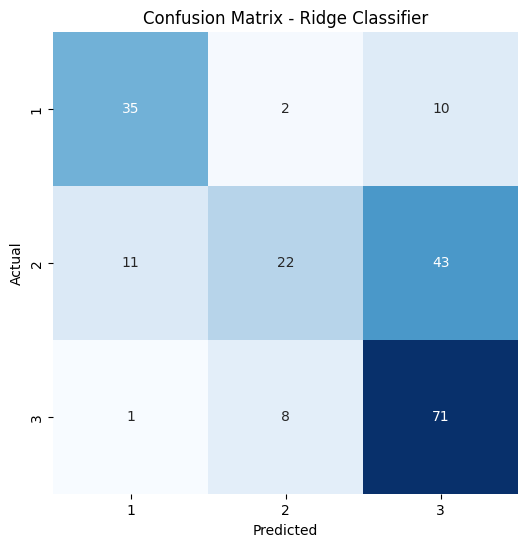

Accuracy: 0.6305
Precision (Weighted): 0.6555
Recall (Weighted): 0.6305
F1-Score (Weighted): 0.5993

MLP Classifier (Best Model) Evaluation:


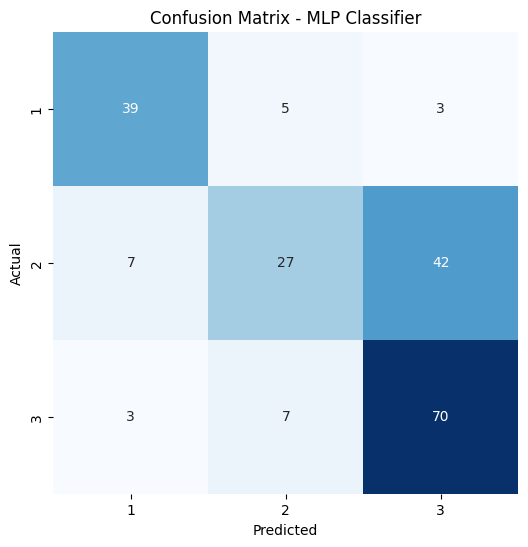

Accuracy: 0.6700
Precision (Weighted): 0.6833
Recall (Weighted): 0.6700
F1-Score (Weighted): 0.6468

Stacking (Best Model) Evaluation:


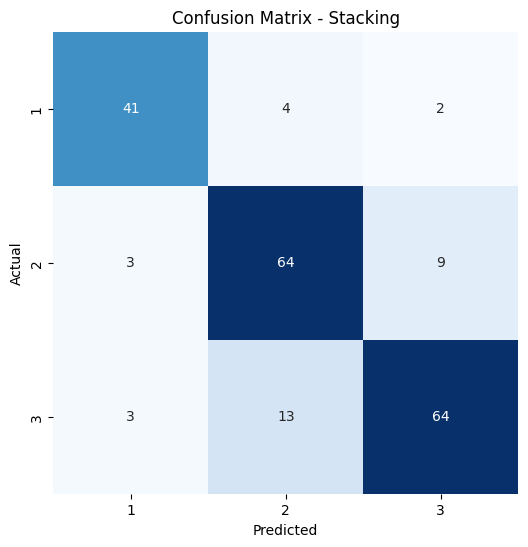

Accuracy: 0.8325
Precision (Weighted): 0.8341
Recall (Weighted): 0.8325
F1-Score (Weighted): 0.8326

Bagging (Best Model) Evaluation:


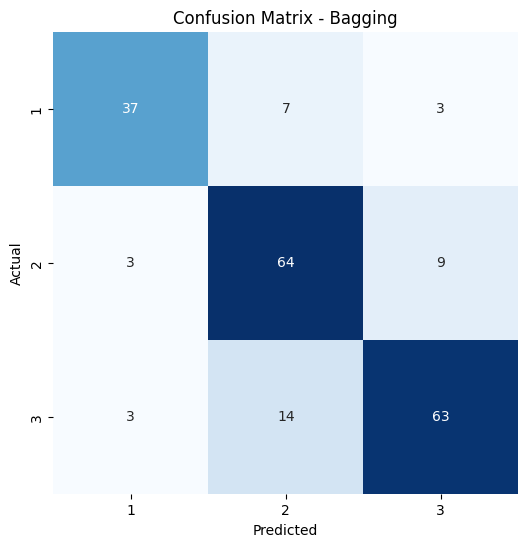

Accuracy: 0.8079
Precision (Weighted): 0.8121
Recall (Weighted): 0.8079
F1-Score (Weighted): 0.8084


In [66]:
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)

    # Confusion Matrix for Multi-Class
    cm = confusion_matrix(y_test, y_pred)

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Other evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (Weighted): {precision:.4f}")
    print(f"Recall (Weighted): {recall:.4f}")
    print(f"F1-Score (Weighted): {f1:.4f}")

# Set up KFold cross-validation and GridSearchCV
kf = KFold(n_splits=10, shuffle=True, random_state=42)
best_models = {}

# Grid Search with Cross-Validation
for name, model in classifiers.items():
    print(f"Tuning hyperparameters for {name} using GridSearchCV and 10-fold CV...")
    grid_search = GridSearchCV(model, param_grids[name], cv=kf, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best Params for {name}: {grid_search.best_params_}")

# Evaluate all the models
for name, model in best_models.items():
    print(f"\n{name} (Best Model) Evaluation:")
    evaluate_model(model, X_test, y_test, name)

In [68]:
import shap
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

model_results = {}

for name, model in best_models.items():
    print(f"Evaluating {name}...")

    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    tp = np.diagonal(cm)
    fn = cm.sum(axis=1) - tp
    fp = cm.sum(axis=0) - tp
    tn = cm.sum() - (tp + fn + fp)

    model_results[name] = {'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn}

    print(f"{name} Confusion Matrix: ")
    for i in range(len(tp)):
        print(f"Class {i}: TP={tp[i]}, TN={tn[i]}, FP={fp[i]}, FN={fn[i]}")

Evaluating Logistic Regression...
Logistic Regression Confusion Matrix: 
Class 0: TP=40, TN=140, FP=16, FN=7
Class 1: TP=21, TN=120, FP=7, FN=55
Class 2: TP=71, TN=75, FP=48, FN=9
Evaluating SVM...
SVM Confusion Matrix: 
Class 0: TP=40, TN=146, FP=10, FN=7
Class 1: TP=28, TN=117, FP=10, FN=48
Class 2: TP=70, TN=78, FP=45, FN=10
Evaluating Decision Tree...
Decision Tree Confusion Matrix: 
Class 0: TP=40, TN=148, FP=8, FN=7
Class 1: TP=66, TN=99, FP=28, FN=10
Class 2: TP=54, TN=116, FP=7, FN=26
Evaluating Random Forest...
Random Forest Confusion Matrix: 
Class 0: TP=40, TN=151, FP=5, FN=7
Class 1: TP=62, TN=105, FP=22, FN=14
Class 2: TP=60, TN=109, FP=14, FN=20
Evaluating AdaBoost...
AdaBoost Confusion Matrix: 
Class 0: TP=34, TN=147, FP=9, FN=13
Class 1: TP=15, TN=118, FP=9, FN=61
Class 2: TP=71, TN=58, FP=65, FN=9
Evaluating Naive Bayes...
Naive Bayes Confusion Matrix: 
Class 0: TP=30, TN=148, FP=8, FN=17
Class 1: TP=14, TN=116, FP=11, FN=62
Class 2: TP=73, TN=56, FP=67, FN=7
Evaluatin

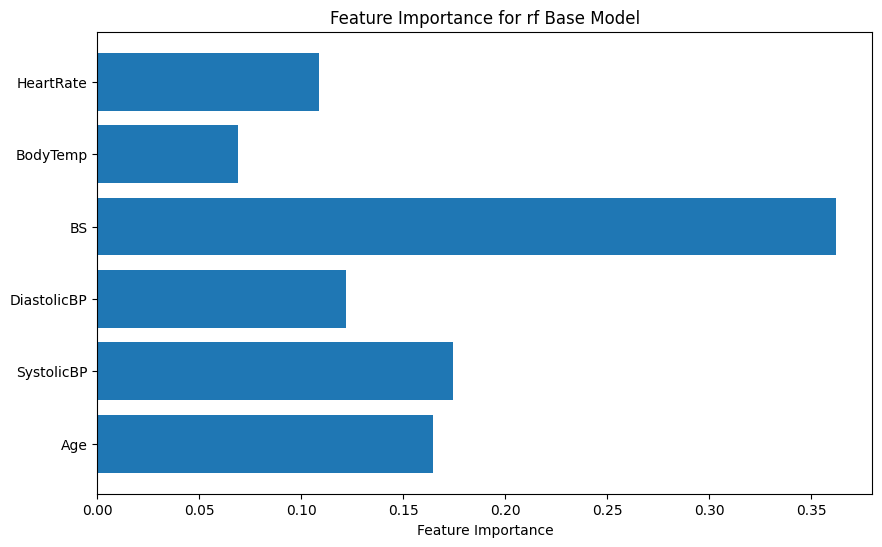

In [74]:
import matplotlib.pyplot as plt
import numpy as np

stacking_model = best_models['Stacking']

base_models = stacking_model.named_estimators_

feature_importances = {}

for name, model in base_models.items():
    if hasattr(model, 'feature_importances_'):
        feature_importances[name] = model.feature_importances_

for name, importances in feature_importances.items():
    plt.figure(figsize=(10, 6))
    plt.barh(X.columns, importances)
    plt.xlabel('Feature Importance')
    plt.title(f'Feature Importance for {name} Base Model')
    plt.show()

In [78]:
pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 5.9 MB/s eta 0:00:00


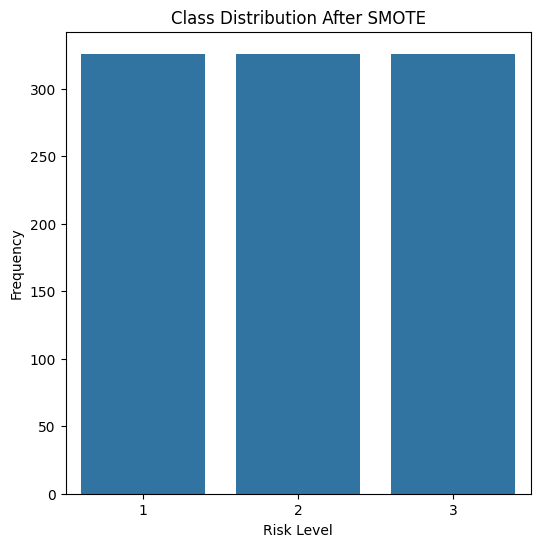

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE


data = pd.read_csv("/content/Maternal Health Risk Data Set.csv")
data['RiskLevel'] = data['RiskLevel'].map({'high risk': 1, 'mid risk': 2, 'low risk': 3})

X = data.drop('RiskLevel', axis=1)
y = data['RiskLevel']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

plt.figure(figsize=(6, 6))
sns.countplot(x=y_train_resampled)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Risk Level")
plt.ylabel("Frequency")
plt.show()

Tuning hyperparameters for Logistic Regression using GridSearchCV and 10-fold CV...
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Best Params for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Tuning hyperparameters for SVM using GridSearchCV and 10-fold CV...
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best Params for SVM: {'C': 1, 'kernel': 'rbf'}
Tuning hyperparameters for Decision Tree using GridSearchCV and 10-fold CV...
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best Params for Decision Tree: {'max_depth': 15, 'min_samples_split': 2}
Tuning hyperparameters for Random Forest using GridSearchCV and 10-fold CV...
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best Params for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Tuning hyperparameters for AdaBoost using GridSearchCV and 10-fold CV...
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best Params for AdaBoost: {'l

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best Params for MLP Classifier: {'activation': 'relu', 'hidden_layer_sizes': (100,)}
Tuning hyperparameters for Stacking using GridSearchCV and 10-fold CV...
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best Params for Stacking: {}
Tuning hyperparameters for Bagging using GridSearchCV and 10-fold CV...
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best Params for Bagging: {'max_samples': 0.8, 'n_estimators': 100}

Logistic Regression (Best Model) Evaluation:


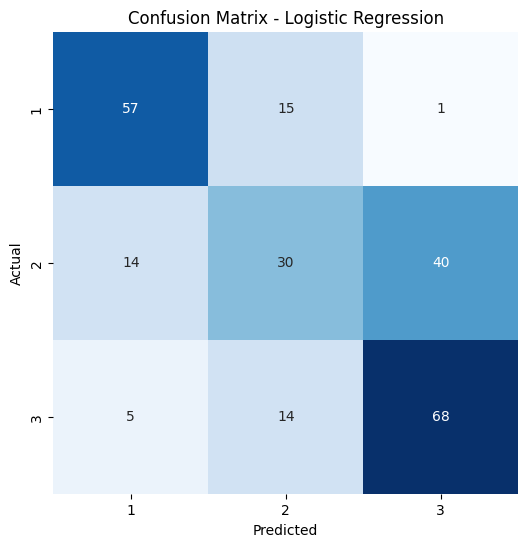

Accuracy: 0.6352
Precision (Weighted): 0.6219
Recall (Weighted): 0.6352
F1-Score (Weighted): 0.6208

SVM (Best Model) Evaluation:


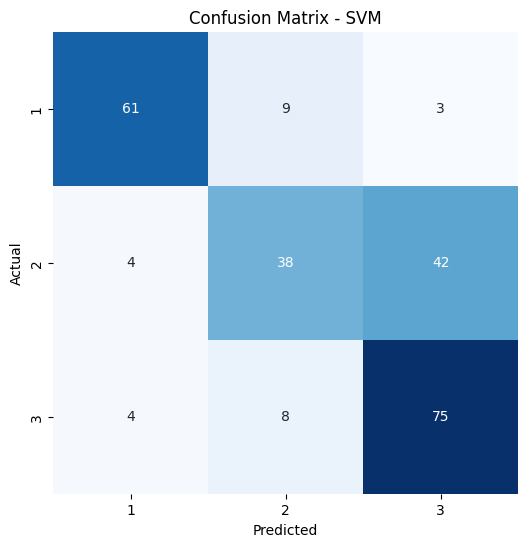

Accuracy: 0.7131
Precision (Weighted): 0.7252
Recall (Weighted): 0.7131
F1-Score (Weighted): 0.7036

Decision Tree (Best Model) Evaluation:


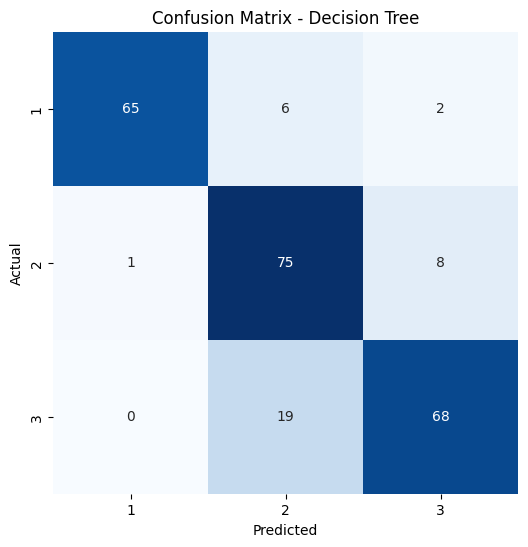

Accuracy: 0.8525
Precision (Weighted): 0.8637
Recall (Weighted): 0.8525
F1-Score (Weighted): 0.8543

Random Forest (Best Model) Evaluation:


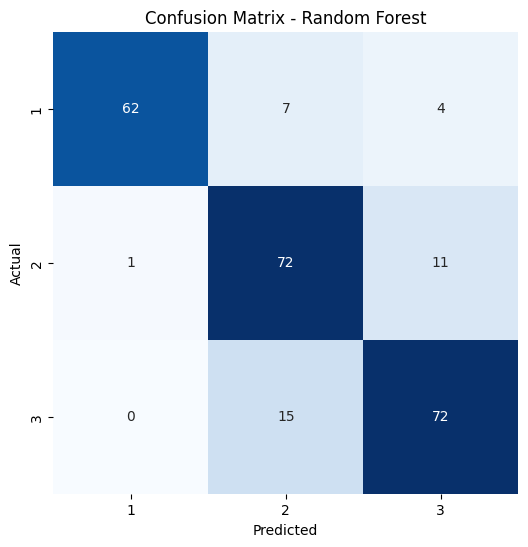

Accuracy: 0.8443
Precision (Weighted): 0.8532
Recall (Weighted): 0.8443
F1-Score (Weighted): 0.8464

AdaBoost (Best Model) Evaluation:


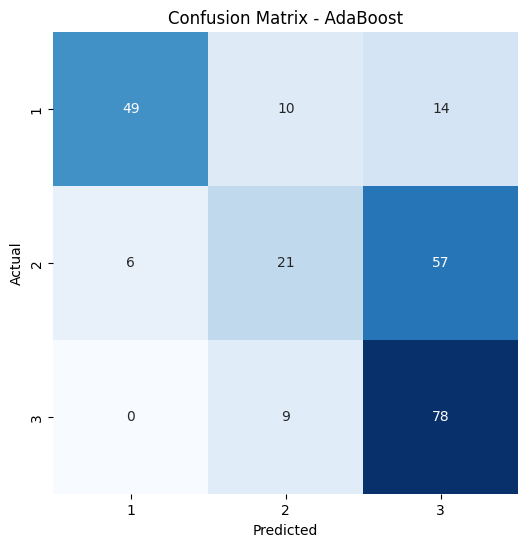

Accuracy: 0.6066
Precision (Weighted): 0.6339
Recall (Weighted): 0.6066
F1-Score (Weighted): 0.5814

Naive Bayes (Best Model) Evaluation:


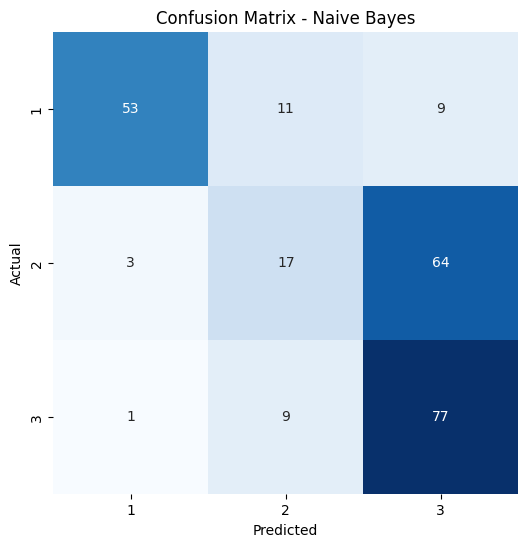

Accuracy: 0.6025
Precision (Weighted): 0.6194
Recall (Weighted): 0.6025
F1-Score (Weighted): 0.5724

KNN (Best Model) Evaluation:


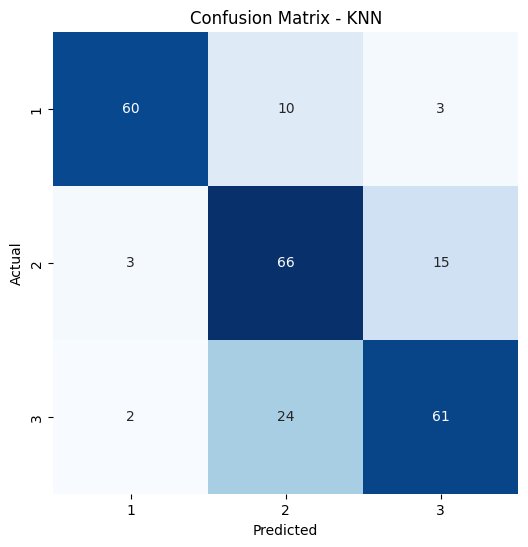

Accuracy: 0.7664
Precision (Weighted): 0.7787
Recall (Weighted): 0.7664
F1-Score (Weighted): 0.7692

Ridge Classifier (Best Model) Evaluation:


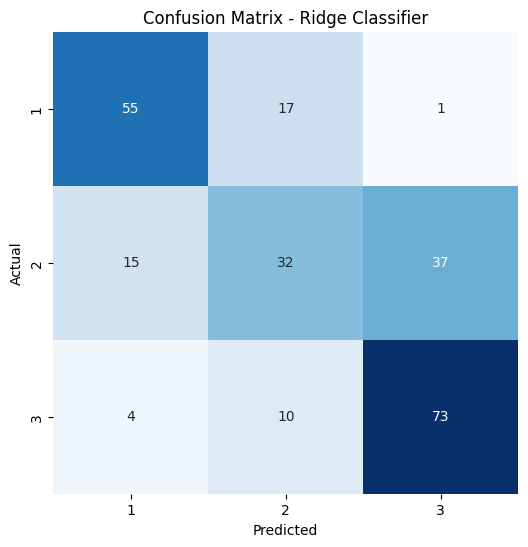

Accuracy: 0.6557
Precision (Weighted): 0.6436
Recall (Weighted): 0.6557
F1-Score (Weighted): 0.6409

MLP Classifier (Best Model) Evaluation:


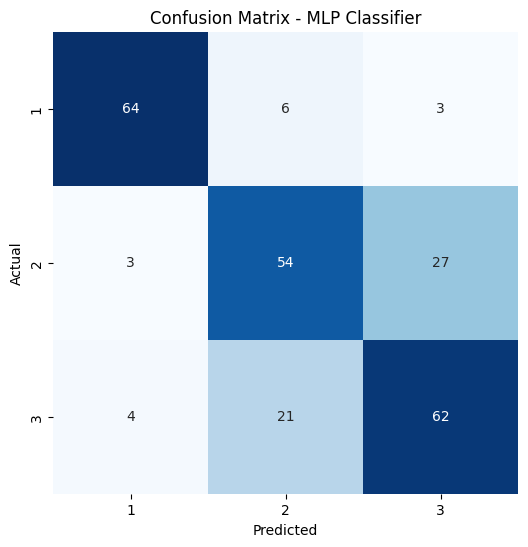

Accuracy: 0.7377
Precision (Weighted): 0.7395
Recall (Weighted): 0.7377
F1-Score (Weighted): 0.7383

Stacking (Best Model) Evaluation:


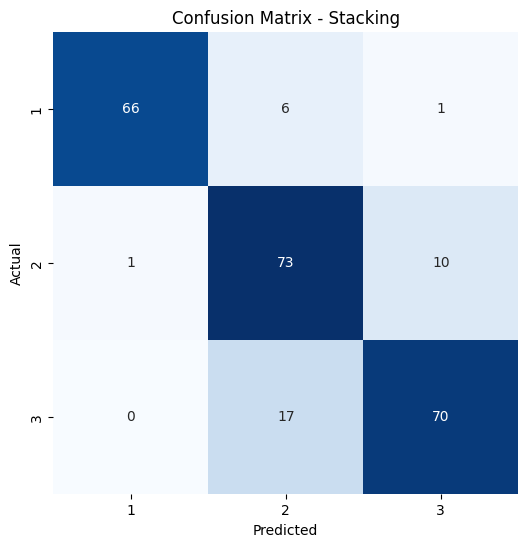

Accuracy: 0.8566
Precision (Weighted): 0.8646
Recall (Weighted): 0.8566
F1-Score (Weighted): 0.8585

Bagging (Best Model) Evaluation:


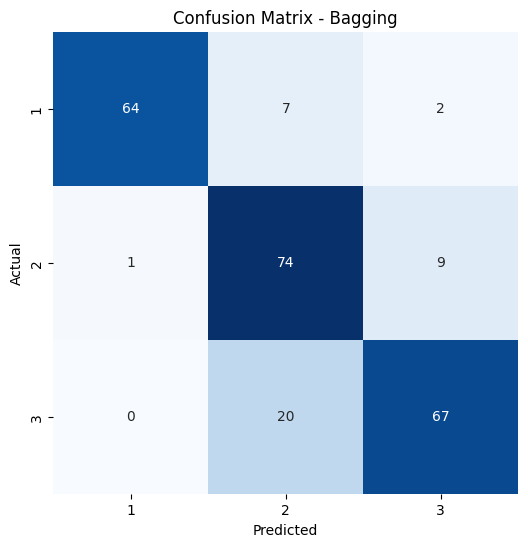

Accuracy: 0.8402
Precision (Weighted): 0.8531
Recall (Weighted): 0.8402
F1-Score (Weighted): 0.8425


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Ridge Classifier': RidgeClassifier(),
    'MLP Classifier': MLPClassifier(),
    'Stacking': StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier()),
            ('svm', SVC())
        ], final_estimator=LogisticRegression()
    ),
    'Bagging': BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)  # Corrected parameter name
}

param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10], 'solver': ['liblinear']},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Decision Tree': {'max_depth': [5, 10, 15], 'min_samples_split': [2, 5]},
    'Random Forest': {'n_estimators': [50, 100], 'max_depth': [5, 10], 'min_samples_split': [2, 5]},
    'AdaBoost': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]},
    'Naive Bayes': {},
    'KNN': {'n_neighbors': [3, 5, 7]},
    'Ridge Classifier': {'alpha': [0.1, 1, 10]},
    'MLP Classifier': {'hidden_layer_sizes': [(50,), (100,)], 'activation': ['relu', 'tanh']},
    'Stacking': {},  # No hyperparameters for StackingClassifier
    'Bagging': {'n_estimators': [50, 100], 'max_samples': [0.5, 0.8]}
}

kf = KFold(n_splits=10, shuffle=True, random_state=42)

best_models = {}

for name, model in classifiers.items():
    print(f"Tuning hyperparameters for {name} using GridSearchCV and 10-fold CV...")
    grid_search = GridSearchCV(model, param_grids[name], cv=kf, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best Params for {name}: {grid_search.best_params_}")

def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (Weighted): {precision:.4f}")
    print(f"Recall (Weighted): {recall:.4f}")
    print(f"F1-Score (Weighted): {f1:.4f}")

for name, model in best_models.items():
    print(f"\n{name} (Best Model) Evaluation:")
    evaluate_model(model, X_test, y_test, name)

In [83]:
import shap

model_results = {}

for name, model in best_models.items():
    print(f"Evaluating {name}...")

    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    tp = np.diagonal(cm)
    fn = cm.sum(axis=1) - tp
    fp = cm.sum(axis=0) - tp
    tn = cm.sum() - (tp + fn + fp)

    model_results[name] = {'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn}

    print(f"{name} Confusion Matrix: ")
    for i in range(len(tp)):
        print(f"Class {i}: TP={tp[i]}, TN={tn[i]}, FP={fp[i]}, FN={fn[i]}")

Evaluating Logistic Regression...
Logistic Regression Confusion Matrix: 
Class 0: TP=57, TN=152, FP=19, FN=16
Class 1: TP=30, TN=131, FP=29, FN=54
Class 2: TP=68, TN=116, FP=41, FN=19
Evaluating SVM...
SVM Confusion Matrix: 
Class 0: TP=61, TN=163, FP=8, FN=12
Class 1: TP=38, TN=143, FP=17, FN=46
Class 2: TP=75, TN=112, FP=45, FN=12
Evaluating Decision Tree...
Decision Tree Confusion Matrix: 
Class 0: TP=65, TN=170, FP=1, FN=8
Class 1: TP=75, TN=135, FP=25, FN=9
Class 2: TP=68, TN=147, FP=10, FN=19
Evaluating Random Forest...
Random Forest Confusion Matrix: 
Class 0: TP=62, TN=170, FP=1, FN=11
Class 1: TP=72, TN=138, FP=22, FN=12
Class 2: TP=72, TN=142, FP=15, FN=15
Evaluating AdaBoost...
AdaBoost Confusion Matrix: 
Class 0: TP=49, TN=165, FP=6, FN=24
Class 1: TP=21, TN=141, FP=19, FN=63
Class 2: TP=78, TN=86, FP=71, FN=9
Evaluating Naive Bayes...
Naive Bayes Confusion Matrix: 
Class 0: TP=53, TN=167, FP=4, FN=20
Class 1: TP=17, TN=140, FP=20, FN=67
Class 2: TP=77, TN=84, FP=73, FN=10


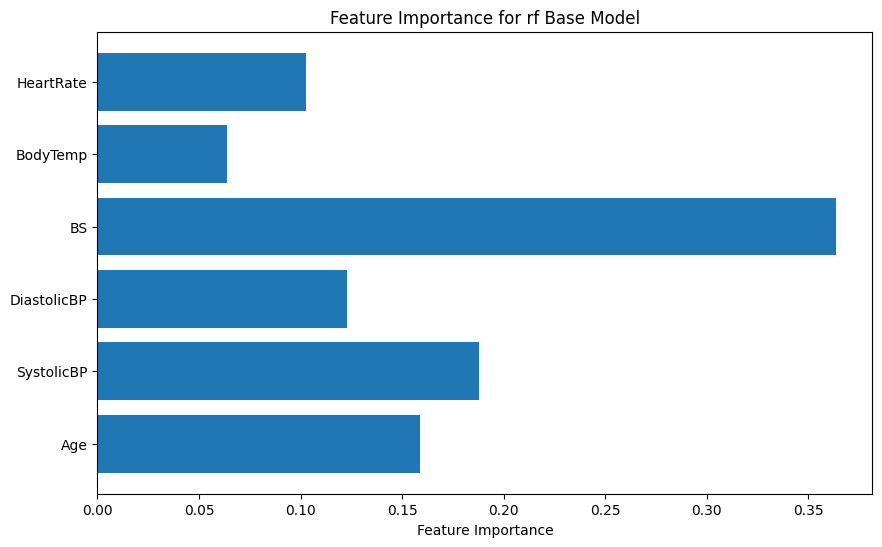

In [84]:
stacking_model = best_models['Stacking']
base_models = stacking_model.named_estimators_

feature_importances = {}

for name, model in base_models.items():
    if hasattr(model, 'feature_importances_'):
        feature_importances[name] = model.feature_importances_

for name, importances in feature_importances.items():
    plt.figure(figsize=(10, 6))
    plt.barh(X.columns, importances)
    plt.xlabel('Feature Importance')
    plt.title(f'Feature Importance for {name} Base Model')
    plt.show()